In [2]:
#Normal Equation

In [3]:
import numpy as np
#fake dataset
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

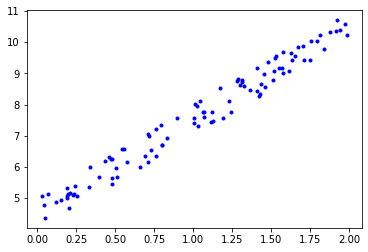

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")

In [5]:
#computing theta^ (theta_best)
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to reach instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta^ = ", theta_best)

theta^ =  [[4.53138887]
 [3.01361812]]


In [6]:
#Since we used 4 + 3*X, it was expected to be 4 and 3, but the result is close enough
#NOw we can use theta_best to make predictions

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53138887],
       [10.55862511]])

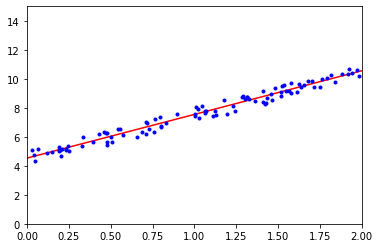

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
#Using scikit learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.53138887]), array([[3.01361812]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.53138887],
       [10.55862511]])

In [11]:
#Exploring Linear Regression
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta^: ", theta_best_svd)

Theta^:  [[4.53138887]
 [3.01361812]]


In [12]:
#Using the pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.53138887],
       [3.01361812]])

In [13]:
#Batch Gradient descent
eta = 0.1  #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  #random initialization
print(theta)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[1.59612174]
 [0.78221541]]
[[4.53138887]
 [3.01361812]]


In [14]:
#implementing SGD
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2*xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients

print(theta)

[[4.53047098]
 [3.02164619]]


In [15]:
#scikit-learn SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.5013869]), array([3.0013512]))

In [16]:
#Mini batch SGD
n_iterations = 50
minibatch_size = 10

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 5, 50

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

print(theta)

[[4.50516263]
 [3.03639372]]


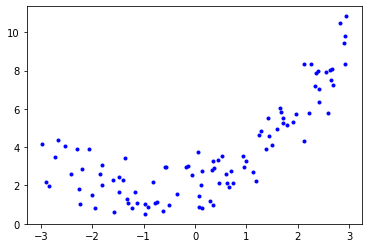

In [17]:
#Polynomial Regression

#fake data
m = 100
X = 6*np.random.rand(m,1)-3
y = (0.5*X**2)+X+2+np.random.randn(m,1)
plt.plot(X, y, "b.")

In [18]:
#Transforming the dataset to get second order features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.9735233] [[0.95038538 0.52577032]]


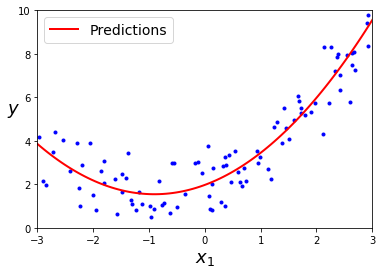

In [20]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [21]:
#Learning Curves

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

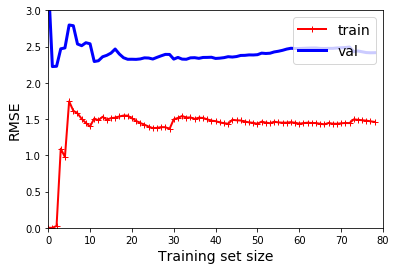

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown

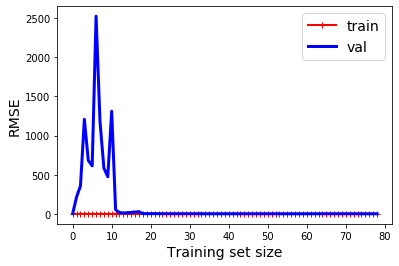

In [23]:
from sklearn.pipeline import Pipeline

polynom_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynom_regression, X, y)

In [24]:
#Regularized Linear Models

#Some fake data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [25]:
#Ridge Regression
from sklearn.linear_model import Ridge

rigde_reg = Ridge(alpha=1, solver='cholesky')
rigde_reg.fit(X, y)
rigde_reg.predict([[1.5]])

array([[1.55071465]])

In [26]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [30]:
#Elastic Net
# MSE + l1_ratio*(Lasso) + (1-l1_ratio)*(Ridge)

from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X, y)
print("Mix = 0.5\n\t", elastic_reg.predict([[1.5]]))

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic_reg.fit(X, y)
print("Mix = 0.3\n\t", elastic_reg.predict([[1.5]]))

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.7)
elastic_reg.fit(X, y)
print("Mix = 0.7\n\t", elastic_reg.predict([[1.5]]))

Mix = 0.5
	 [1.54333232]
Mix = 0.3
	 [1.54533901]
Mix = 0.7
	 [1.54123001]


In [34]:
#Fake data for Early Stopping

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [36]:
#Early Stopping

from sklearn.preprocessing import StandardScaler
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
    learning_rate='constant', eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [38]:
print("Best Model: ", best_model)
print("Best epoch: ", best_epoch)

Best Model:  SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)
Best epoch:  443
